# 0. Import Libaries + Data

In [1]:
!pip install changepoynt

In [2]:
# import pandas as pd
# import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
import matplotlib.dates as mdates

from datetime import datetime
import dateutil.parser
import copy

# from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
# from sklearn.metrics import classification_report,roc_auc_score, make_scorer
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.base import BaseEstimator, TransformerMixin


# import tensorflow as tf
# from tensorflow.keras import backend as K
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# from keras.regularizers import l1, l2
# from keras.optimizers import Adam

# from sklearn import tree
# from sklearn.base import BaseEstimator
# from sklearn.preprocessing import StandardScaler

# from hypopt import GridSearch
# import keras_tuner as kt

# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from keras.losses import BinaryCrossentropy

# from optuna import Trial, create_study, create_trial



import warnings
warnings.filterwarnings("ignore")

In [3]:
from model import *
from preprocess import *
from crawling import *

Phiên bản Vnstock 3.2.6 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 3.2.3

Phiên bản Vnai 2.0.4 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnai --upgrade`.
Lịch sử phiên bản: https://pypi.org/project/vnai/#history
Phiên bản hiện tại 2.0.2

In [4]:
start_time = '2017-12-31'
# start_time = '2023-12-31'
end_time = '2025-03-01'

list_choice = 'VN30'

daily_full = VN_Stock_fully_data(start_time, end_time)

In [5]:
# start_time = '2017-12-31'
# end_time = '2025-03-01'

# list_choice = 'VN30'

# hourly_test = VN_Stock_close_data(start_time, end_time, interval = '1H')
# hourly_test

In [6]:
# start_time = '2017-12-31'
# end_time = '2025-03-01'

# list_choice = 'VN30'

# daily_test = VN_Stock_close_data(start_time, end_time)
# daily_test

In [7]:
# plt.plot(30 - daily_test.isna().sum(axis = 1))
# plt.title(f"Số lượng công ty trên {list_choice} có dữ liệu theo thời gian")
# plt.xlabel("Thời gian")
# plt.ylabel("Số lượng công ty")

# 1. Analysis

In [8]:
def describe_data_list(data):
  ''' Hàm mô tả dữ liệu
      INPUT: data_list(list): Một list bao gồm các dataframe
        * Lưu ý: Nếu chỉ sử dụng 1 công ty, chỉ cần truyền vào 1 dataframe dưới dạng list: (VD: [df])
      OUTPUT: các thông tin chung và mô tả các biến số của tất cả dataframe có trong list
  '''
  print(data.name)
  print(data.info())
  print(data.describe())
  print("=========================================")

  return

In [9]:
# plt.figure(figsize = (24, 12))
# plt.tight_layout()
# plt.xticks([])
# plt.yticks([])
# sns.reset_orig()
# plt.suptitle("Khối lượng giao dịch của các công ty trong VN30")
# for x in range(1,31):
#   ax = plt.subplot(5,6, x)
#   ax.plot(daily_full[x-1].index,daily_full[x-1]['volume'])
#   plt.xticks([])
#   plt.title(daily_full[x-1].name)
#   # plt.savefig(daily_full[x].name)

# 2. Cleaning Data

# 3. Feature Engineering

In [26]:
num_feature = feature_engineering(daily_full[0])[1] - 2
feature = pd.DataFrame(np.empty((0, num_feature + 2)))
for x in range(0,30):
  temp = feature_engineering(daily_full[x])[0]
  feature.columns = temp.columns
  feature = pd.concat([feature,temp], axis = 0)
  # print(feature.shape)
feature = feature.sort_index()


0.07502900000000001 13.2985 24.134319466811647
0.07502900000000001 13.2985 24.134319466811647
1.7736893750000013 52.48025 505.23647237849815
0.606037499999999 25.1935 55.3242178030916
1.9814507500000005 49.44199999999999 173.94597381122088
0.48401874999999994 24.51525 53.22973150982197
0.7378063750000003 52.327 1302.1097428082726
3.0733027500000003 68.733 97.57024001944319
0.5954447500000011 18.717499999999998 92.62495666297781
0.11708400000000012 11.7375 21.485847103578713
0.2823367499999998 19.674750000000003 71.18489470230442
0.07807599999999992 7.631750000000001 46.09608767355901
0.12237575000000012 12.99475 24.82328953837828
5.7391763749999996 73.1625 464.13620433038204
1.547399 41.52275 219.81844515394206
1.2912758750000006 43.411249999999995 55.33061591301677
2.962586875000005 76.32124999999999 288.6978516585448
0.05175275000000003 7.766 12.706850269928816
0.1769298749999999 21.262499999999996 6.696034828907852
0.3297797499999999 14.92175 69.24392031699601
0.45352275 21.56874999

In [27]:
feature['good_signal'].value_counts()

good_signal
0.0    37579
1.0     7281
Name: count, dtype: int64

In [28]:
# feature = pd.get_dummies(feature, columns=['Symbol'], drop_first = True)
# feature = feature.drop(['Symbol'],axis = 1)
feature

,Symbol,RSI20,PSY20,RSI60,PSY60,RSI252,PSY252,MACD_5_20,MACD_20_60,VWAP,changepoint_bocd,signal_momentum,good_signal,Close
2019-01-04,ACB,0.261905,0.25,0.403909,0.333333,0.492348,0.456349,-0.143337,-0.156807,7.463786,0.054031,-0.087209,0.0,6.28
2019-01-04,VJC,0.123959,0.30,0.319276,0.383333,0.495924,0.456349,-5.481703,-6.273283,145.110446,0.108102,-0.124827,0.0,114.00
2019-01-04,VRE,0.225907,0.30,0.414148,0.433333,0.468317,0.432540,-1.584344,-0.887964,36.513193,0.126678,-0.165312,0.0,26.71
2019-01-04,BID,0.389565,0.30,0.454268,0.383333,0.510975,0.484127,-0.292983,0.155836,17.735836,0.069522,-0.067987,0.0,17.41
2019-01-04,SHB,0.229167,0.10,0.364055,0.216667,0.478261,0.365079,-0.075726,-0.112358,3.978772,0.053033,-0.090592,0.0,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,BVH,0.688312,0.45,0.637387,0.466667,0.561680,0.440476,1.894701,3.271105,50.101616,0.000000,0.114173,0.0,56.60
2025-02-28,BID,0.595960,0.50,0.574335,0.516667,0.483083,0.428571,0.462302,0.735471,27.245200,0.000000,0.023750,0.0,40.95
2025-02-28,VPB,0.579592,0.50,0.516949,0.416667,0.512124,0.436508,0.194517,0.069097,17.136746,0.000000,0.021196,0.0,18.79
2025-02-28,VIB,0.523585,0.55,0.613520,0.516667,0.530721,0.396825,0.199288,0.553448,15.558699,0.000000,0.005035,0.0,19.96


In [13]:
# feature.to_csv("feature.csv")

In [14]:
# corr = feature.drop(columns = ['Symbol']).corr()
# corr.style.background_gradient(cmap='coolwarm')

In [29]:
feature

,Symbol,RSI20,PSY20,RSI60,PSY60,RSI252,PSY252,MACD_5_20,MACD_20_60,VWAP,changepoint_bocd,signal_momentum,good_signal,Close
2019-01-04,ACB,0.261905,0.25,0.403909,0.333333,0.492348,0.456349,-0.143337,-0.156807,7.463786,0.054031,-0.087209,0.0,6.28
2019-01-04,VJC,0.123959,0.30,0.319276,0.383333,0.495924,0.456349,-5.481703,-6.273283,145.110446,0.108102,-0.124827,0.0,114.00
2019-01-04,VRE,0.225907,0.30,0.414148,0.433333,0.468317,0.432540,-1.584344,-0.887964,36.513193,0.126678,-0.165312,0.0,26.71
2019-01-04,BID,0.389565,0.30,0.454268,0.383333,0.510975,0.484127,-0.292983,0.155836,17.735836,0.069522,-0.067987,0.0,17.41
2019-01-04,SHB,0.229167,0.10,0.364055,0.216667,0.478261,0.365079,-0.075726,-0.112358,3.978772,0.053033,-0.090592,0.0,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,BVH,0.688312,0.45,0.637387,0.466667,0.561680,0.440476,1.894701,3.271105,50.101616,0.000000,0.114173,0.0,56.60
2025-02-28,BID,0.595960,0.50,0.574335,0.516667,0.483083,0.428571,0.462302,0.735471,27.245200,0.000000,0.023750,0.0,40.95
2025-02-28,VPB,0.579592,0.50,0.516949,0.416667,0.512124,0.436508,0.194517,0.069097,17.136746,0.000000,0.021196,0.0,18.79
2025-02-28,VIB,0.523585,0.55,0.613520,0.516667,0.530721,0.396825,0.199288,0.553448,15.558699,0.000000,0.005035,0.0,19.96


In [16]:
def Volatility_scale(train_data, ignore_na=False, adjust = True, com = 60, min_periods=0):

    scaled_data = pd.DataFrame(columns=train_data.columns, dtype=float)
    scaled_data.drop(columns = ['Symbol'], inplace = True)

    for company, group in train_data.groupby('Symbol'):  # Process each company separately
      non_scaled_data = group[['signal_momentum',]]

      # volume_data = group[['MA_volume20','MA_volume60','MA_volume252']]
      volume_data = group[['Volume']]

      temp = group
      temp.drop(columns = ['signal_momentum','Symbol','Volume'], inplace = True)
      # Tính daily volatility (vol)
      temp = temp.ewm(ignore_na=ignore_na,
                            adjust=adjust,
                            com=com,
                            min_periods=min_periods).std(bias = False)

      temp  /= np.sqrt(252)  # scale lại theo 252 ngày active trading

      volume_data = (volume_data - volume_data.rolling(window=60,min_periods = 1).mean()) / volume_data.rolling(window=60, min_periods = 1).std()

      temp = pd.concat([temp, non_scaled_data], axis=1)
      temp = pd.concat([temp, volume_data], axis=1)

      scaled_data = pd.concat([scaled_data,temp], axis = 0)

    return scaled_data

scaler = FunctionTransformer(Volatility_scale)

In [17]:
# def Volatility_scale(train_data, ignore_na=False, adjust = True, com = 60, min_periods=0):

#     scaled_data = pd.DataFrame(columns=train_data.columns, dtype=float)
#     scaled_data.drop(columns = ['Symbol'], inplace = True)

#     for company, group in train_data.groupby('Symbol'):  # Process each company separately
#     #   non_scaled_data = group[['signal_momentum','RSI20','RSI60','RSI252','PSY20','PSY60','PSY252']]

#     #   # volume_data = group[['MA_volume20','MA_volume60','MA_volume252']]
#     #   volume_data = group[['Volume']]

#       temp = group
#       temp.drop(columns = ['Symbol'], inplace = True)
#     #   # Tính daily volatility (vol)
#     #   temp = temp.ewm(ignore_na=ignore_na,
#     #                         adjust=adjust,
#     #                         com=com,
#     #                         min_periods=min_periods).std(bias = False)

#     #   temp  /= np.sqrt(252)  # scale lại theo 252 ngày active trading

#     #   volume_data = (volume_data - volume_data.rolling(window=60,min_periods = 1).mean()) / volume_data.rolling(window=60, min_periods = 1).std()

#     #   temp = pd.concat([temp, non_scaled_data], axis=1)
#     #   temp = pd.concat([temp, volume_data], axis=1)

#       scaled_data = pd.concat([scaled_data,temp], axis = 0)

#     return scaled_data

# scaler = FunctionTransformer(Volatility_scale)

In [18]:
# corr = Volatility_scale(feature).corr()
# corr.style.background_gradient(cmap='coolwarm')

In [19]:
# class TimeSeriesScalerDF(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.previous_max = {}  # Store max per column

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.copy()
#         transformed_df = pd.DataFrame(index=X.index, columns=X.columns)

#         for col in X.columns:
#             col_values = X[col].values.astype(float)
#             running_max = self.previous_max.get(col, col_values[0])  # Keep previous max

#             transformed_col = np.zeros_like(col_values)
#             for i in range(len(col_values)):
#                 if i == 0 and col not in self.previous_max:
#                     transformed_col[i] = col_values[i]  # Keep first value
#                 else:
#                     running_max = max(running_max, col_values[i - 1])
#                     transformed_col[i] = (col_values[i] - running_max) / running_max if running_max != 0 else 0

#             transformed_df[col] = transformed_col
#             self.previous_max[col] = running_max  # Save max for next batch

#         return transformed_df


In [20]:
# for x ,y in trainX.groupby('Symbol'):
#     print(f"Processing {x}")
#     print(y)

In [21]:
class TimeSeriesScalerDF(BaseEstimator, TransformerMixin):
    def __init__(self, list_choice):
        stock = Vnstock().stock(symbol='ACB', source='VCI')
        self.company_column = stock.listing.symbols_by_group(list_choice) # Column name identifying companies
        self.previous_min = {}  # Store cumulative min per (company, column)
        self.previous_max = {}  # Store cumulative max per (company, column)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        transformed_df = pd.DataFrame(columns=X.columns, dtype=float)
        transformed_df.drop(columns = ['Symbol'], inplace = True)
        print(X.groupby(self.company_column))
        for company, group in X.groupby('Symbol'):  # Process each company separately
            temp = pd.DataFrame(index= group.index, columns=X.columns, dtype=float)
            temp.drop(columns = ['Symbol'], inplace = True)
            # print(f"Processing {company}")
            # print(group)
            for col in group.columns:
                if col == 'Symbol':
                    continue  # Skip the company column

                col_values = group[col].astype(float)
                # print(col_values)

                # Retrieve previous min/max for this (company, column) pair
                key = (company, col)
                running_min = self.previous_min.get(key, col_values.iloc[0])
                running_max = self.previous_max.get(key, col_values.iloc[0])

                # Compute cumulative min and max
                cumin_t = np.minimum.accumulate(np.insert(col_values.values, 0, running_min))[1:]
                cumax_t = np.maximum.accumulate(np.insert(col_values.values, 0, running_max))[1:]

                # print([cumin_t,cumax_t])

                # Apply scaling formula
                transformed_col = (col_values - cumin_t) / (cumax_t - cumin_t)
                transformed_col = np.nan_to_num(transformed_col, nan=0.0)  # Handle division by zero

                temp[col] = transformed_col

                # Store the last min and max for future use
                self.previous_min[key] = cumin_t[-1]
                self.previous_max[key] = cumax_t[-1]

            transformed_df = pd.concat([transformed_df,temp], axis = 0)
            transformed_df = transformed_df.sort_index()

        return transformed_df


In [22]:
def prepare_X_y(df):
    ''' Hàm chia X,y từ dữ liệu
          INPUT: df(dataframe): dữ liệu đã được tạo feature
          OUTPUT: X,y(dataframe): X là các biến độc lập, y là biến phụ thuộc sử dụng trong các mô hình
    '''
    columns = df.columns.tolist()
    remove_list = ['Symbol', 'Close', 'good_signal']
    columns = list(set(columns) - set(remove_list))
    X = df[columns]
    info = df[['Symbol', 'Close']]
    y = df['good_signal']

    return X, y , info

def split_train_test(X, y, info, train_size=0.8):
    ''' Hàm chia tập train, test cho dữ liệu:
          INPUT:
            X,y(dataframe): X là các biến độc lập, y là biến phụ thuộc sử dụng trong các mô hình
            train_size: tỉ lệ chia train/test; mặc định là 0.8
          OUTPUT: trainX, testX ,trainY, testY(dataframe): các tập train/test đã được chia ra
    '''
    # Chia tập train/test
    # trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, shuffle=False)

    split_idx = int(len(X) * train_size)  # Compute the split index

    trainX, testX = X.loc[X.index <= dateutil.parser.parse(str(X.iloc[[split_idx]].index[0]))], X.loc[X.index > dateutil.parser.parse(str(X.iloc[[split_idx]].index[0]))]  # Non-overlapping split
    trainY, testY = y.loc[y.index <= dateutil.parser.parse(str(y.iloc[[split_idx]].index[0]))], y.loc[y.index > dateutil.parser.parse(str(y.iloc[[split_idx]].index[0]))]
    infoX, infoY = info.loc[info.index <= dateutil.parser.parse(str(info.iloc[[split_idx]].index[0]))], info.loc[info.index > dateutil.parser.parse(str(info.iloc[[split_idx]].index[0]))]

    # In ra những thông tin chi tiết về kích cỡ tập train/test; và khoảng thời gian xử lí
    print('TrainX:' + str(trainX.shape) + f". Dữ liệu từ ngày {trainX.index.min().date()} đến {trainX.index.max().date()}")
    print('TrainY:' + str(trainY.shape) + f". Dữ liệu từ ngày {trainY.index.min().date()} đến {trainY.index.max().date()}")
    print('TestX:' + str(testX.shape) + f". Dữ liệu từ ngày {testX.index.min().date()} đến {testX.index.max().date()}")
    print('TestY:' + str(testY.shape) + f". Dữ liệu từ ngày {testY.index.min().date()} đến {testY.index.max().date()}")

    return trainX, testX ,trainY, testY , infoX, infoY

In [23]:
# def manual_time_series_split(data, n_splits = 5):
#     """Manually splits time series data into train-test sets."""
#     n_samples = len(data)
#     split_size = (n_samples - n_splits) // (n_splits + 1)  # Size of each test set

#     splits = []
#     for i in range(n_splits):
#         train_end = split_size * (i + 1) + i  # Expanding train set
#         test_start = train_end
#         test_end = test_start + split_size

#         train_indices = np.argwhere(data.index <= dateutil.parser.parse(str(data.iloc[[train_end]].index[0]))).flatten().tolist()
#         test_indices = np.argwhere((data.index <= dateutil.parser.parse(str(data.iloc[[test_end]].index[0]))) & (data.index > dateutil.parser.parse(str(data.iloc[[test_start]].index[0])))).flatten().tolist()

#         splits.append((train_indices, test_indices))

#     return splits

In [24]:
# # Scale data before applying PCA
# # Scaled_data = Volatility_scale(trainX)[1:]
# Scaled_data = Volatility_scale(trainX)

# # Use fit and transform method

# # Set the n_components=3
# principal=PCA(n_components=2)
# principal.fit(Scaled_data)
# x=principal.transform(Scaled_data)

# # Check the dimensions of data after PCA
# print(x.shape)

# plt.figure(figsize=(10,10))
# plt.scatter(x[:,0],x[:,1],c=trainY,cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')
# plt.show()



In [30]:
X, y,info = prepare_X_y(feature)

trainX, testX ,trainY, testY, infoX,infoY = split_train_test(X, y,info)
print(trainX)
print(trainY)

TrainX:(35890, 11). Dữ liệu từ ngày 2019-01-04 đến 2023-12-13
TrainY:(35890,). Dữ liệu từ ngày 2019-01-04 đến 2023-12-13
TestX:(8970, 11). Dữ liệu từ ngày 2023-12-14 đến 2025-02-28
TestY:(8970,). Dữ liệu từ ngày 2023-12-14 đến 2025-02-28
            MACD_5_20        VWAP  signal_momentum     PSY60     RSI60  \
2019-01-04  -0.143337    7.463786        -0.087209  0.333333  0.403909   
2019-01-04  -5.481703  145.110446        -0.124827  0.383333  0.319276   
2019-01-04  -1.584344   36.513193        -0.165312  0.433333  0.414148   
2019-01-04  -0.292983   17.735836        -0.067987  0.383333  0.454268   
2019-01-04  -0.075726    3.978772        -0.090592  0.216667  0.364055   
...               ...         ...              ...       ...       ...   
2023-12-13   0.256678   23.608515        -0.010359  0.416667  0.445388   
2023-12-13   0.044225   11.993403        -0.041054  0.433333  0.493491   
2023-12-13   0.030914   30.716581        -0.045643  0.466667  0.408273   
2023-12-13   0.260425 

In [ ]:
# # Scale data before applying PCA
# Scaled_data = TimeSeriesScalerDF().transform(trainX)
# # Scaled_data = trainX

# # Use fit and transform method

# # Set the n_components=2

# principal=PCA(n_components=2)
# principal.fit(Scaled_data)
# x=principal.transform(Scaled_data)

# plt.figure(figsize=(10,10))
# plt.scatter(x[:,0],x[:,1],c=trainY,cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')
# plt.show()


In [ ]:
# trainX = pd.DataFrame(np.empty((0,36)))
# testX = pd.DataFrame(np.empty((0,36)))
# trainY = pd.Series()
# testY = pd.Series()
# for x in range(0,30):
#   temp = feature_engineering(daily_full[x])

#   X, y = prepare_X_y(temp)

#   trainX_temp, testX_temp ,trainY_temp, testY_temp = split_train_test(X, y)
#   trainX.columns = trainX_temp.columns
#   trainX = pd.concat([trainX,trainX_temp], axis = 0)
#   testX.columns = testX_temp.columns
#   testX = pd.concat([testX,testX_temp], axis = 0)
#   trainY = pd.concat([trainY,trainY_temp], axis = 0)
#   testY = pd.concat([testY,testY_temp], axis = 0)

#   print([trainX.shape,trainY.shape,testX.shape, testY.shape])

# 4. Model

## Random forest

In [ ]:
# # Generate a sample time series dataset
# X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# # Manually define test fold indices for a time series split (5 folds)
# n_samples = len(y)
# n_splits = 5
# test_size = n_samples // (n_splits + 1)  # Ensure growing training set
# test_fold = np.full(n_samples, -1)  # Initialize all as training (-1)

# for i in range(n_splits):
#     start_test = (i + 1) * test_size
#     end_test = start_test + test_size
#     test_fold[start_test:end_test] = i  # Assign fold number

# # Create PredefinedSplit
# ps = PredefinedSplit(test_fold)


# split_idx = int(len(X) * train_size)  # Compute the split index

# trainX, testX = X.loc[X.index <= dateutil.parser.parse(str(X.iloc[[split_idx]].index[0]))], X.loc[X.index > dateutil.parser.parse(str(X.iloc[[split_idx]].index[0]))]  # Non-overlapping split
# trainY, testY = y.loc[y.index <= dateutil.parser.parse(str(y.iloc[[split_idx]].index[0]))], y.loc[y.index > dateutil.parser.parse(str(y.iloc[[split_idx]].index[0]))]


In [ ]:
test_model = train_random_forest(trainX,trainY)

# test_model = train_random_forest_optuna(trainX,trainY)

In [34]:
prediction = test_model.predict(trainX)
print(classification_report(trainY, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29458
         1.0       1.00      1.00      1.00      6432

    accuracy                           1.00     35890
   macro avg       1.00      1.00      1.00     35890
weighted avg       1.00      1.00      1.00     35890



In [35]:
prediction = test_model.predict(testX)
print(classification_report(testY, prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      8121
         1.0       0.65      0.47      0.55       849

    accuracy                           0.93      8970
   macro avg       0.80      0.72      0.75      8970
weighted avg       0.92      0.93      0.92      8970



In [ ]:
# prediction = test_model.predict(trainX)
# prediction *= np.sign(trainX["signal_momentum"])
# print(classification_report(np.sign(trainX["signal_momentum"]) * trainY, prediction))

In [ ]:
# prediction = test_model.predict(testX)
# prediction *= np.sign(testX["signal_momentum"])
# print(classification_report(np.sign(testX["signal_momentum"]) * testY, prediction))

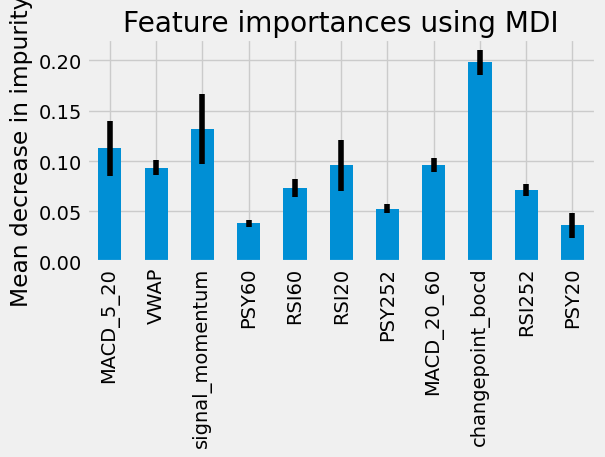

In [36]:
importances = test_model['classifier'].feature_importances_

# feature_names = trainX.drop(columns = ['Symbol']).columns

feature_names = trainX.columns


forest_importances = pd.Series(importances, index=feature_names)

std = np.std([tree.feature_importances_ for tree in test_model['classifier'].estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [ ]:
prediction

In [47]:
testX["prediction"] = prediction
testX['Symbol'] = infoY['Symbol']
testX['Close'] = infoY['Close']
testX

,MACD_5_20,VWAP,signal_momentum,PSY60,RSI60,RSI20,PSY252,MACD_20_60,changepoint_bocd,RSI252,PSY20,prediction,Symbol,Close
2023-12-14,0.105850,44.373964,-0.002805,0.450000,0.412010,0.494382,0.500000,-0.378372,0.056231,0.517075,0.50,0.0,PLX,31.99
2023-12-14,0.259531,50.906976,-0.004315,0.450000,0.427835,0.486312,0.428571,-0.639567,0.057963,0.464459,0.45,0.0,BVH,39.23
2023-12-14,-0.306990,21.423491,-0.036337,0.366667,0.368702,0.184874,0.436508,-1.088584,0.066442,0.470431,0.15,0.0,SSB,19.89
2023-12-14,0.215566,11.892855,-0.002637,0.433333,0.574586,0.491228,0.503968,0.387963,0.058306,0.563888,0.50,0.0,HDB,15.13
2023-12-14,-0.051507,64.915467,-0.020656,0.433333,0.392391,0.454545,0.472222,-2.607245,0.053941,0.474939,0.45,0.0,VHM,40.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,1.894701,50.101616,0.114173,0.466667,0.637387,0.688312,0.440476,3.271105,0.000000,0.561680,0.45,0.0,BVH,56.60
2025-02-28,0.462302,27.245200,0.023750,0.516667,0.574335,0.595960,0.428571,0.735471,0.000000,0.483083,0.50,0.0,BID,40.95
2025-02-28,0.194517,17.136746,0.021196,0.416667,0.516949,0.579592,0.436508,0.069097,0.000000,0.512124,0.50,0.0,VPB,18.79
2025-02-28,0.199288,15.558699,0.005035,0.516667,0.613520,0.523585,0.396825,0.553448,0.000000,0.530721,0.55,0.0,VIB,19.96


In [48]:
testX.to_csv("testX.csv")

In [ ]:
# import pickle

# # save the iris classification model as a pickle file
#   model_pkl_file = "random_forest_model_0.5892.pkl"

# with open(model_pkl_file, 'wb') as file:
#     pickle.dump(test_model, file)

# Sharpe Loss

In [ ]:
model, history = train_Lasso_supervised(trainX, trainY,1,1, num_feature= num_feature,binary = True)
# model, history = train_LSTM_supervised(trainX, trainY,1,binary = True)  

Trial 100 Complete [00h 00m 24s]
loss: 0.3979175388813019

Best loss So Far: 0.3952261209487915
Total elapsed time: 00h 30m 43s
Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6429  
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5998
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4340
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4235
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4114
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4170
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4250
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4205
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4076
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4114
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4063
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4086
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4080
Epoch 14

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 398 (1.56 KB)

 Trainable params: 132 (528.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266 (1.04 KB)

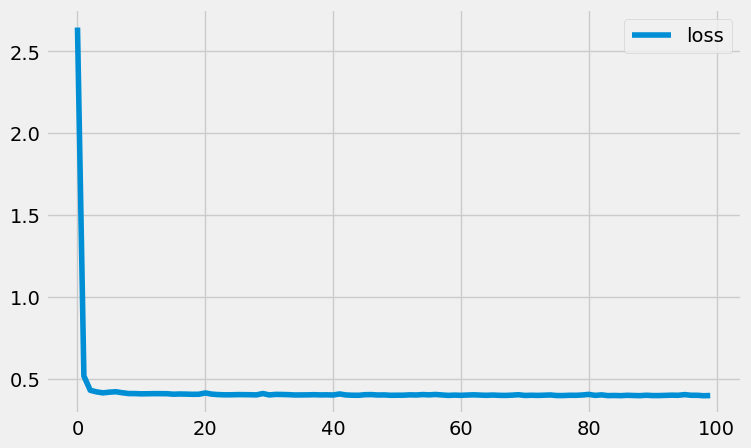

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
prediction = test_model.predict(trainX)
print(classification_report( trainY, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29458
         1.0       1.00      1.00      1.00      6432

    accuracy                           1.00     35890
   macro avg       1.00      1.00      1.00     35890
weighted avg       1.00      1.00      1.00     35890



In [ ]:
prediction = test_model.predict(testX)
print(classification_report( testY, prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      8121
         1.0       0.66      0.47      0.55       849

    accuracy                           0.93      8970
   macro avg       0.80      0.72      0.75      8970
weighted avg       0.92      0.93      0.92      8970



In [ ]:
np.unique(prediction, return_counts= True)

(array([0., 1.]), array([8361,  609], dtype=int64))

In [ ]:
model, history = train_MLP_supervised(trainX, trainY,1,1,  num_feature= num_feature,binary = True)

Trial 100 Complete [00h 00m 25s]
loss: 0.47262969613075256

Best loss So Far: 0.3775405287742615
Total elapsed time: 00h 36m 54s
Epoch 1/100
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6796
Epoch 1: loss improved from inf to 0.53959, saving model to Checkpoint/checkpoint_mlp_sup_binary.model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6468
Epoch 2/100
21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4581 
Epoch 2: loss improved from 0.53959 to 0.45307, saving model to Checkpoint/checkpoint_mlp_sup_binary.model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4565
Epoch 3/100
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4427
Epoch 3: loss improved from 0.45307 to 0.44692, saving model to Checkpoint/checkpoint_mlp_sup_binary.model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4434
Epoch 4/100
20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4318 
Epoch 4: loss improved from 0.44692 to 0.42617, saving model to Checkpoint/checkpoint_mlp_sup_binary.model.k

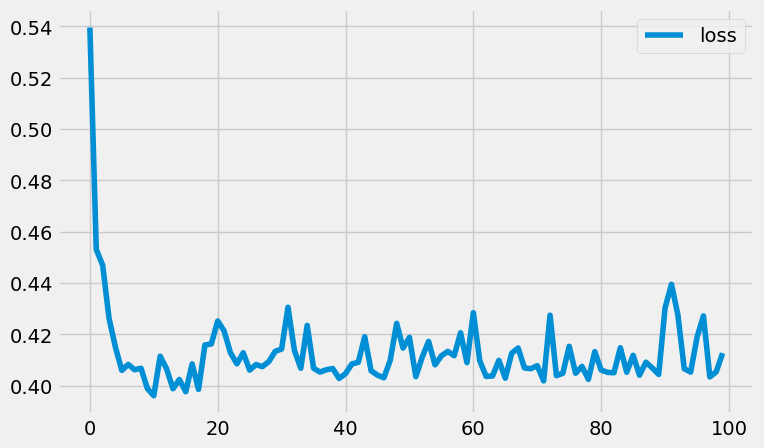

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 380 (1.49 KB)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 254 (1020.00 B)

In [ ]:
prediction = test_model.predict(trainX)
print(classification_report(trainY, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29458
         1.0       1.00      1.00      1.00      6432

    accuracy                           1.00     35890
   macro avg       1.00      1.00      1.00     35890
weighted avg       1.00      1.00      1.00     35890



In [ ]:
prediction = test_model.predict(testX)
print(classification_report(testY, prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      8121
         1.0       0.66      0.47      0.55       849

    accuracy                           0.93      8970
   macro avg       0.80      0.72      0.75      8970
weighted avg       0.92      0.93      0.92      8970



In [ ]:
np.unique(prediction, return_counts= True)

(array([0., 1.]), array([8361,  609], dtype=int64))

In [ ]:
model, history = train_LSTM_supervised(trainX, trainY,1, num_feature= num_feature,binary = True)  

Trial 100 Complete [00h 04m 16s]
loss: 0.306769996881485

Best loss So Far: 0.2743125557899475
Total elapsed time: 05h 52m 05s
Epoch 1/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6251
Epoch 2/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4238
Epoch 3/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3917
Epoch 4/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3715
Epoch 5/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3583
Epoch 6/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3493
Epoch 7/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3464
Epoch 8/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3334
Epoch 9/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3409
Epoch 10/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3328
Epoch 11/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3297
Epoch 12/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3341
Epoch 13/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step 

In [ ]:
model.get_config()

{'name': 'sequential_1',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 11, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_layer_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'LSTM',
   'config': {'name': 'lstm_1',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'zero_output_for_mask': False,
    'units': 16,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'Glor

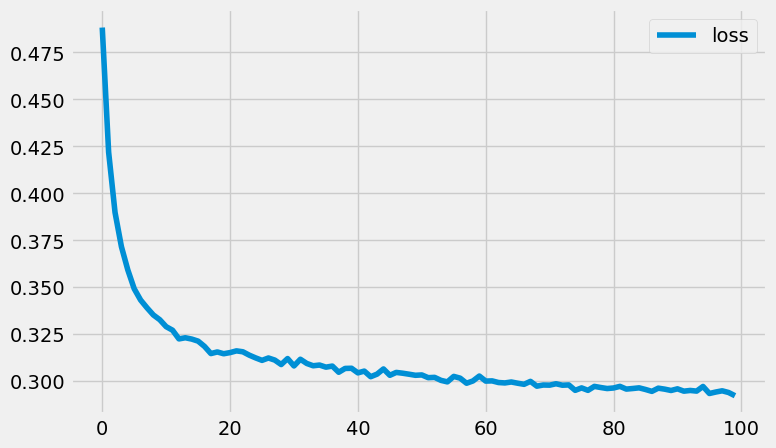

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,019 (15.70 KB)

 Trainable params: 1,339 (5.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,680 (10.47 KB)

In [ ]:
prediction = test_model.predict(trainX)
print(classification_report(trainY, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29458
         1.0       1.00      1.00      1.00      6432

    accuracy                           1.00     35890
   macro avg       1.00      1.00      1.00     35890
weighted avg       1.00      1.00      1.00     35890



In [ ]:
prediction = test_model.predict(testX)
print(classification_report( testY, prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      8121
         1.0       0.66      0.47      0.55       849

    accuracy                           0.93      8970
   macro avg       0.80      0.72      0.75      8970
weighted avg       0.92      0.93      0.92      8970

